# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [2]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [3]:
with open('superhero/superheroes.txt', 'r') as f:
  data = f.read()
data[:198]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrha\t\nthe rhino\t\nmajor glory\t\ndrago\t\nking vegeta\t\nphoebus apollo\t\nwarpath\t\nthe lost sapphire\t\ndurok t'

In [4]:
## Character level language model
import tensorflow as tf
print(tf.__version__)

2.5.0


In [5]:
# tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    # keep tab characters, but remove other symbols
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [6]:
# convert
tokenizer.fit_on_texts(data)

In [7]:
char_to_index = tokenizer.word_index
index_to_char = dict((v,k) for k,v in char_to_index.items())

index_to_char

{1: '\t',
 2: 'a',
 3: 'e',
 4: 'r',
 5: 'o',
 6: 'n',
 7: 'i',
 8: ' ',
 9: 't',
 10: 's',
 11: 'l',
 12: 'm',
 13: 'h',
 14: 'd',
 15: 'c',
 16: 'u',
 17: 'g',
 18: 'k',
 19: 'b',
 20: 'p',
 21: 'y',
 22: 'w',
 23: 'f',
 24: 'v',
 25: 'j',
 26: 'z',
 27: 'x',
 28: 'q'}

## Task 3

1. Converting between names and sequences

In [8]:
names = data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [9]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [10]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [11]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [12]:
def seq_to_name(seq):
  return "".join(index_to_char[i] for i in seq if i!= 0)

In [13]:
seq_to_name([25, 16, 12, 20, 2, 1])

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [16]:
sequences = []
for name in names:
  seq = name_to_seq(name)
  # atleast 2 characters
  if len(seq) >= 2:
    sequences += [seq[:i] for i in range(2, len(seq)+1)]


In [17]:
sequences

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4],
 [14, 5, 15, 9, 5, 4, 8],
 [14, 5, 15, 9, 5, 4, 8, 23],
 [14, 5, 15, 9, 5, 4, 8, 23, 2],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3, 1],
 [10, 9],
 [10, 9, 2],
 [10, 9, 2, 4],
 [10, 9, 2, 4, 11],
 [10, 9, 2, 4, 11, 7],
 [10, 9, 2, 4, 11, 7, 17],
 [10, 9, 2, 4, 11, 7, 17, 13],
 [10, 9, 2, 4, 11, 7, 17, 13, 9],
 [10, 9, 2, 4, 11, 7, 17, 13, 9, 1],
 [7, 10],
 [7, 10, 7],
 [7, 10, 7, 11],
 [7, 10, 7, 11, 14],
 [7, 10, 7, 11, 14, 16],
 [7, 10, 7, 11, 14, 16, 4],
 [7, 10, 7, 11, 14, 16, 4, 1],
 [11, 2],
 [11, 2, 10],
 [11, 2, 10, 13],
 [11, 2, 10, 13, 3],
 [11, 2, 10, 13, 3, 4],
 [11, 2, 10, 13, 3, 4, 1],
 [24, 2],
 [24, 2, 4],
 [24, 2, 4, 24],
 [24, 2, 4, 24, 2],
 [24, 2, 4, 24, 2, 4],
 [24, 2, 4, 24, 2, 4, 2],
 [24, 2, 4, 24, 2, 4, 2, 1],
 [9, 13],


In [19]:
max_len = max([len(x) for x in sequences])
max_len

33

In [21]:
## padding
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen = max_len,
    padding = 'pre'
)
padded_sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 16],
      dtype=int32)

In [22]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [23]:
## split in example and labels
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]
print(x.shape, y.shape)

(88279, 32) (88279,)


In [28]:
# train-test split
from sklearn.model_selection import train_test_split
# default 30% split
x_train, x_test, y_train, y_test = train_test_split(x,y)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(66209, 32) (66209,) (22070, 32) (22070,)


In [29]:
# looking at the size of vocab, extra 1 for accounting for 0
# a-z, 0, '\t', ' '
num_chars = len(char_to_index.keys()) + 1
num_chars

29

## Task 6: Creating the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential([
    Embedding(num_chars, 8, input_length = max_len-1),
    Conv1D(64, 5, strides = 1, activation = 'tanh', padding='causal'),
    MaxPool1D(2),
    LSTM(32),
    Dense(num_chars, activation = 'softmax')]
)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 8)             232       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            2624      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 29)                957       
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
_________________________________________________________________


## Task 7: Training the Model

In [46]:
h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50, verbose = 2,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3)
    ]
)

Epoch 1/50
2070/2070 - 16s - loss: 1.9817 - accuracy: 0.4066 - val_loss: 2.2071 - val_accuracy: 0.3527
Epoch 2/50
2070/2070 - 16s - loss: 1.9775 - accuracy: 0.4058 - val_loss: 2.2097 - val_accuracy: 0.3551
Epoch 3/50
2070/2070 - 16s - loss: 1.9737 - accuracy: 0.4078 - val_loss: 2.2101 - val_accuracy: 0.3562
Epoch 4/50
2070/2070 - 16s - loss: 1.9705 - accuracy: 0.4078 - val_loss: 2.2098 - val_accuracy: 0.3552
Epoch 5/50
2070/2070 - 16s - loss: 1.9662 - accuracy: 0.4099 - val_loss: 2.2096 - val_accuracy: 0.3569
Epoch 6/50
2070/2070 - 16s - loss: 1.9628 - accuracy: 0.4104 - val_loss: 2.2083 - val_accuracy: 0.3574
Epoch 7/50
2070/2070 - 17s - loss: 1.9598 - accuracy: 0.4117 - val_loss: 2.2075 - val_accuracy: 0.3554
Epoch 8/50
2070/2070 - 16s - loss: 1.9566 - accuracy: 0.4129 - val_loss: 2.2130 - val_accuracy: 0.3526
Epoch 9/50
2070/2070 - 16s - loss: 1.9528 - accuracy: 0.4142 - val_loss: 2.2154 - val_accuracy: 0.3555


## Task 8: Generate Names!

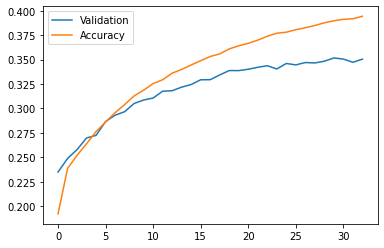

In [35]:
import matplotlib.pyplot as plt
epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label='Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [38]:
def generate_names(seed):
  for i in range(8, 48):
    # get number sequence for seed
    seq = name_to_seq(seed)
    # add padding, make sure the total length does not cross max_len-1
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [seq], padding='pre', maxlen=max_len-1,
        truncating = 'pre'
        )
    
    pred = model.predict(padded)[0]
    pred_char = index_to_char[tf.argmax(pred).numpy()]
    seed += pred_char

    # keep predicting until a tab is found
    if pred_char == '\t':
      break

  print(seed)


In [39]:
generate_names('a')

arth nister	


In [44]:
generate_names('fum')

fummon ii	


In [41]:
generate_names('ab')

abar man	


In [42]:
generate_names('abra')

abrack man	


In [53]:
generate_names('lol')

lolia the shark	
